# Handle Imports

In [4]:
from shapely.geometry import Polygon
from agritech_lidar.data_getter import DataGetter
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Use the new package to fetch some slice of an area

In [7]:
# getter = DataGetter(area_name='USGS_LPC_TX_South_B8_2018_LAS',
#                         boundaries=Polygon([
#                             # (xmin, ymin)
#                             (-10880908.0, 3040000),
#                             # (xmin, ymax)
#                             (-10880908.0, 3045000),
#                             # (xmax, ymax)
#                             (-10875000.0, 3045000),
#                             # (xmax, ymin)
#                             (-10875000.0, 3040000),
#                         ]),
#                         point_types=['Ground', 'Water'],
#                         ouput_path="output/USGS_LPC_TX_South_B8_2018_LAS.tif"
#                         )
# pipeline = getter.build_pipeline()
# # print(pipeline)
# output = getter.execute()
# print(f"output: {output}")
# print(getter.pipeline.arrays[0])

Building the Pipeline...
folder_name: USGS_LPC_TX_South_B8_2018_LAS_2019/
output: 95727137
[(8, 2, 0, 2.04932038e+08, 38574, 1, 1864, 5073, 1, 17., 0, 0, 1, -10875169.55, 3044999.24,  8.56)
 (8, 2, 0, 2.04932038e+08, 36721, 1, 1864, 5073, 1, 17., 0, 0, 1, -10875168.72, 3044999.25,  8.55)
 (8, 2, 0, 2.04932038e+08, 37956, 1, 1864, 5073, 1, 17., 0, 0, 1, -10875167.9 , 3044999.28,  8.56)
 ...
 (0, 2, 0, 2.04914773e+08, 48810, 1, 1728, 5067, 1, -3., 0, 1, 2, -10880776.69, 3044070.53, 11.2 )
 (0, 2, 0, 2.04914773e+08, 49404, 1, 1728, 5067, 1, -4., 0, 1, 2, -10880775.78, 3044070.59, 11.2 )
 (0, 2, 0, 2.04914773e+08, 49999, 1, 1728, 5067, 1, -3., 0, 0, 2, -10880789.59, 3044070.6 , 11.22)]


In [8]:
len(pipeline.arrays)

1

In [9]:
result = pipeline.arrays[0]


# Load the tif file

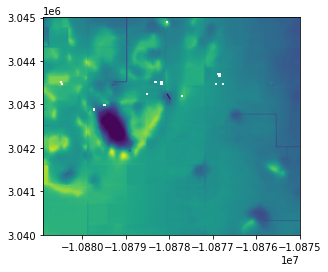

<AxesSubplot:>

In [2]:
dataset = rio.open("output/USGS_LPC_TX_South_B8_2018_LAS.tif")

show(dataset)

In [3]:
print(f"Num of Bands: {dataset.count}")
print(f"Height: {dataset.height}, Width: {dataset.width}")
print(f"CRS: {dataset.crs}")

Num of Bands: 6
Height: 1001, Width: 1182
CRS: EPSG:3857


# show with earthpy

In [34]:
import numpy as np
dataset.read([6]).shape
merged = np.stack([dataset.read(i) for i in range(1, 7)], axis=0)

In [35]:
merged.shape

(6, 1001, 1182)

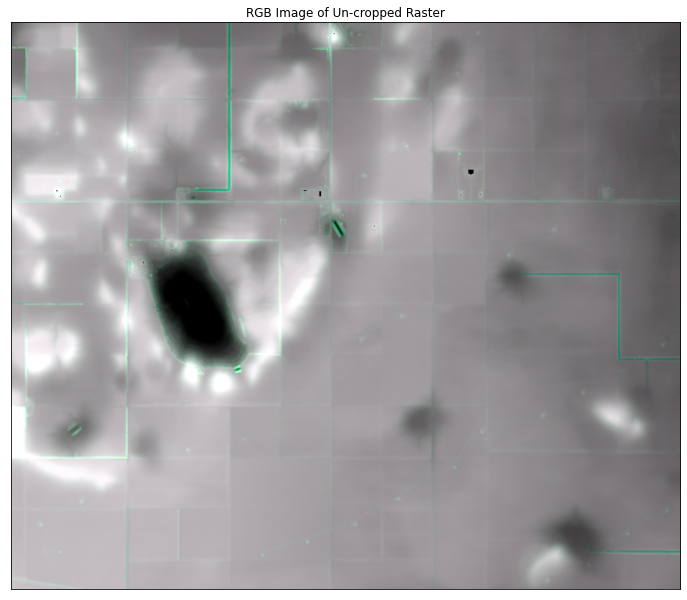

In [36]:
fig, ax = plt.subplots(figsize=(12, 12))
ep.plot_rgb(
    merged,
    ax=ax,
    stretch=True,
    # extent=extent,
    str_clip=0.5,
    title="RGB Image of Un-cropped Raster",
)
plt.show()


(<Figure size 864x864 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

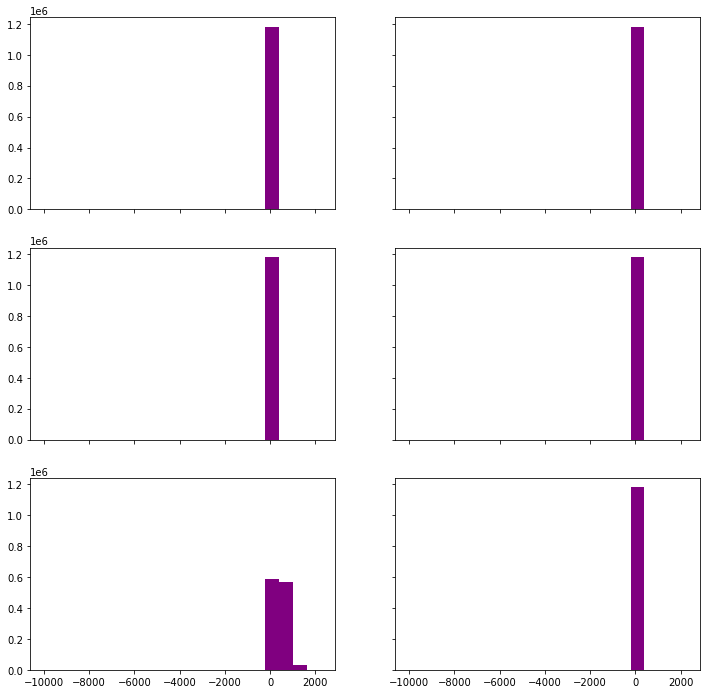

In [37]:
ep.hist(merged)

# show with rasterio using color maps

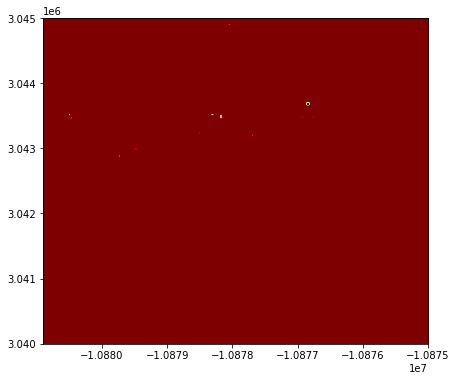

<AxesSubplot:>

In [39]:
plt.figure(figsize=(10, 6))
show((dataset, 1), transform=dataset.transform, cmap='jet')

<AxesSubplot:>

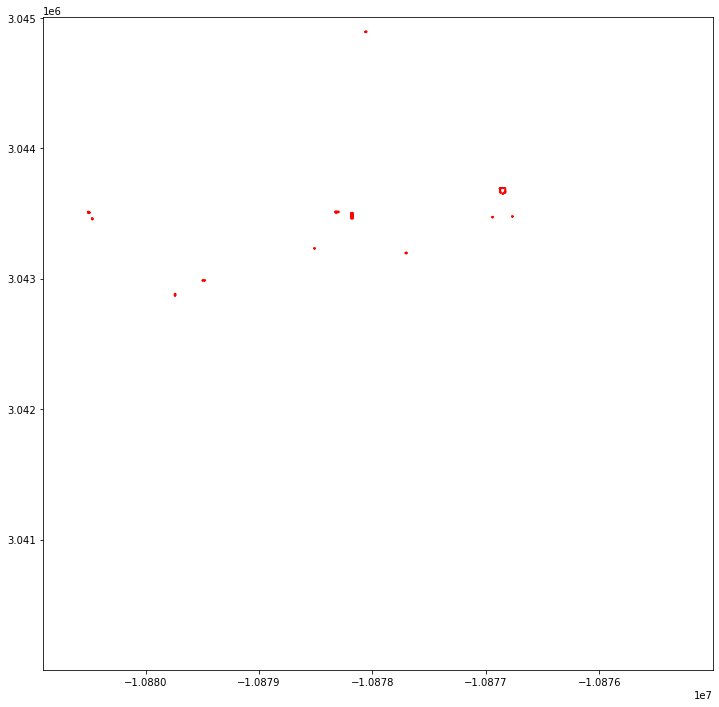

In [40]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((dataset, 1), ax=ax, contour=True, contour_label_kws={})

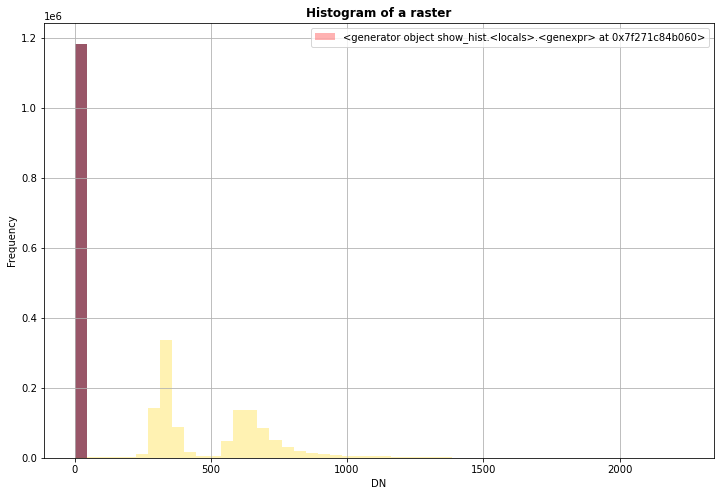

In [41]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    dataset, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")


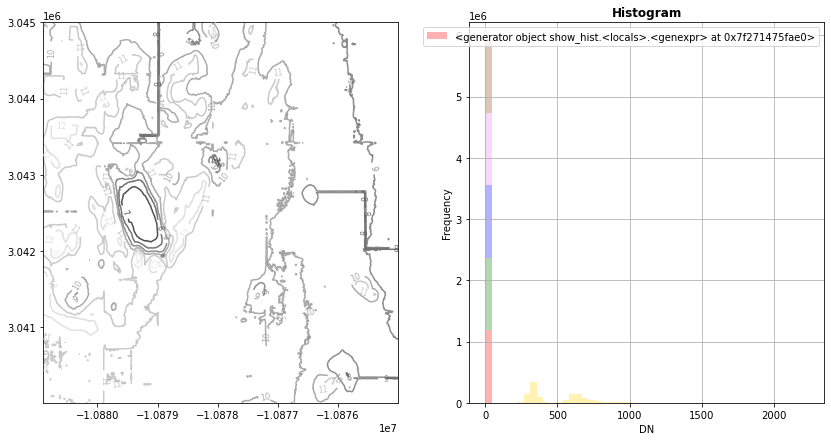

In [44]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show((dataset), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(dataset, bins=50, histtype='stepfilled',
          lw=0.0, stacked=True, alpha=0.3, ax=axhist)
plt.show()
